# Customize the Correlation Matrix


1.   Import Data
2.   Create Correlation Matrix
3.   Set Up Mask To Hide Upper Triangle
4.   Create Heatmap in Seaborn
5.   Export Heatmap



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Step 1
highway = pd.read_csv('Highway1.csv', index_col = 0)

In [0]:
# Step 2
corr_matrix = highway.corr()

In [0]:
highway_dummy = pd.get_dummies(highway.htype)
highway = pd.concat([highway, highway_dummy], axis = 1)

In [0]:
# Step 3
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

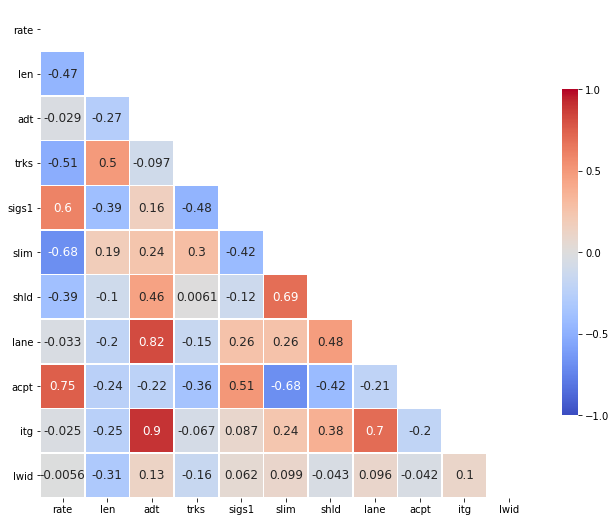

In [20]:
# Step 4
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [0]:
# Step 5
heatmap.get_figure().savefig(‘heatmap.png’, bbox_inches=’tight’)